In [2]:
import pandas as pd #导入Pandas，用于数据读取和处理
# 读入房价数据，示例代码中的文件地址为internet链接，读者也可以下载该文件到本机进行读取
# 如，当数据集和代码文件位于相同本地目录，路径名应为"./house.csv"，或直接放"house.csv"亦可
df_housing = pd.read_csv("./../数据集/house.csv") 
df_housing.head #显示加州房价数据

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

In [4]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

longitude:经度【特征】
latitude:纬度【特征】
housing_median_age:房屋平均年龄【特征】
total_rooms:房屋数目【特征】
tital_bedrooms：卧室总数【特征】
population:人数【特征】
households：户数【特征】
median_income：收入中位数【特征】

median_house_value：房价中位数（机器学习的目标）【标签】

构建特征数据集X和标签数量y, 习惯是把特征集大写，标签集小写 

In [6]:
X = df_housing.drop("median_house_value",axis = 1) #构建特征集X
y = df_housing.median_house_value  # 构建标签集y

In [7]:
from sklearn.model_selection import train_test_split #导入数据集拆分工具
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #以80%/20%的比例进行数据集的拆分

In [8]:
from sklearn.linear_model import LinearRegression #导入线性回归算法模型
model = LinearRegression() #使用线性回归算法
model.fit(X_train, y_train) #用训练集数据，训练机器，拟合函数，确定参数

LinearRegression()

In [12]:
y_pred = model.predict(X_test) #预测测试集的Y值
print ('房价的真值(测试集)',y_test)
print ('预测的房价(测试集)',y_pred)

房价的真值(测试集) 3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64
预测的房价(测试集) [211157.06335416 218581.64298576 465317.31295564 ... 201751.23969632
 160873.51846958 138847.2691335 ]


In [13]:
print("给预测评分：", model.score(X_test, y_test)) #评估预测结果

给预测评分： 0.632101417157952


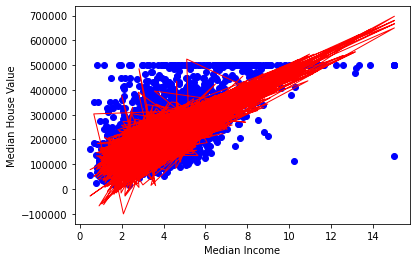

In [17]:
import matplotlib.pyplot as plt # 导入matplotlib画图库
# 用散点图显示家庭收入中位数和房价中位数的分布
plt.scatter(X_test.median_income, y_test,  color='blue')
# 画出回归函数(从特征到预测标签)
plt.plot(X_test.median_income, y_pred, color='red', linewidth=1)
plt.xlabel('Median Income') # X轴-家庭收入中位数
plt.ylabel('Median House Value') # Y轴-房价中位数
plt.show() # 显示房价分布和机器习得的函数图形